In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [4]:
# Load Prophet-ready dataset
df = pd.read_csv("monthly_sales_cleaned.csv")

# Rename columns (if not already done)
df = df.rename(columns={
    'Month': 'ds',
    'Sales': 'y'
})

df['ds'] = pd.to_datetime(df['ds'])
df.head()


,ds,y
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


In [5]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(df)


In [6]:
future = model.make_future_dataframe(periods=6, freq='M')
future.tail()


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
49,2018-01-31
50,2018-02-28
51,2018-03-31
52,2018-04-30
53,2018-05-31


In [7]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
49,2018-01-31,53334.107059,44331.622787,61751.968640
50,2018-02-28,72434.016169,64227.822217,81585.671986
51,2018-03-31,63522.709594,54839.189734,71797.542251
52,2018-04-30,33971.789392,25116.797296,42359.148269
53,2018-05-31,52957.200241,44299.776118,61402.796874


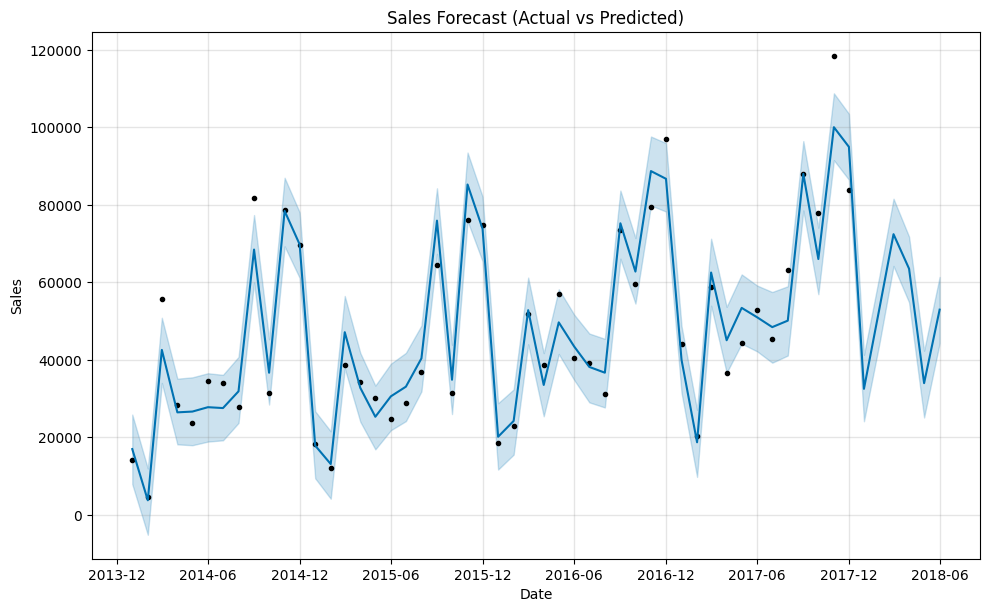

In [8]:
model.plot(forecast)
plt.title("Sales Forecast (Actual vs Predicted)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

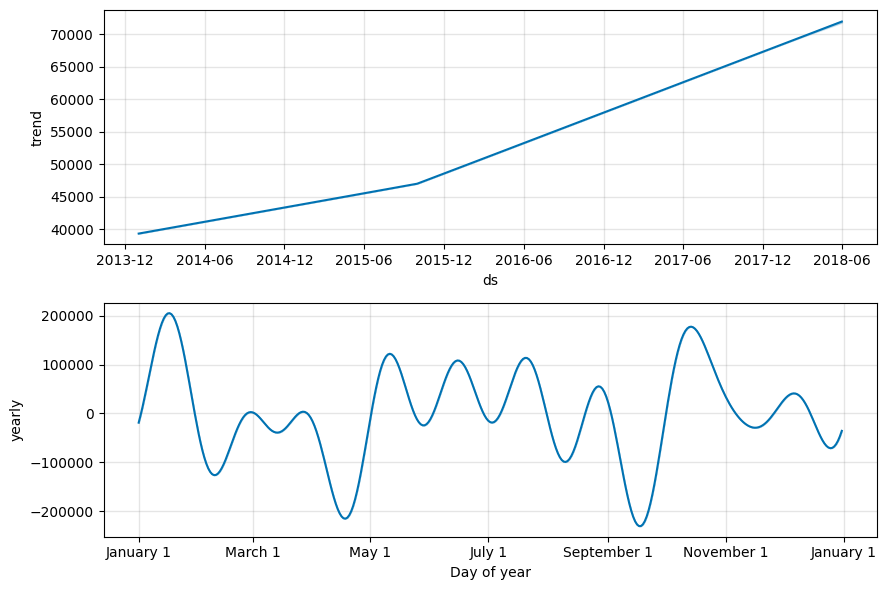

In [9]:
model.plot_components(forecast)
plt.show()

In [11]:
import os

os.makedirs("data/processed", exist_ok=True)

In [12]:
forecast_output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_output.to_csv("data/processed/sales_forecast.csv", index=False)